In [40]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [41]:
 from google.colab import drive
 drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train (1).csv")
data.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [44]:
data = data.drop(["Id"], axis=1)
data.describe()

,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [45]:
#Dropping dimentionless diamonds
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)
data.shape

(43135, 10)

<Axes: xlabel='price', ylabel='y'>

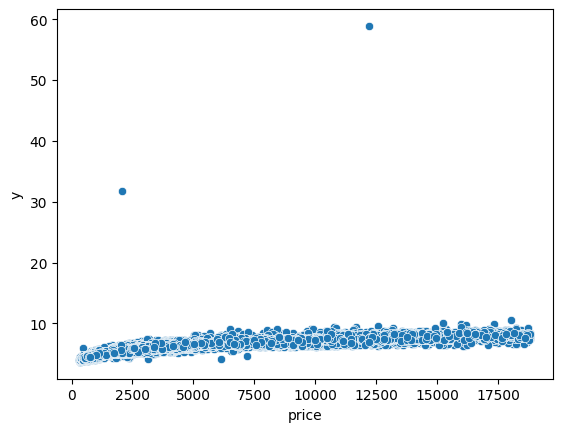

In [46]:
sns.scatterplot(x=data['price'],y=data['y'])

<Axes: xlabel='price', ylabel='z'>

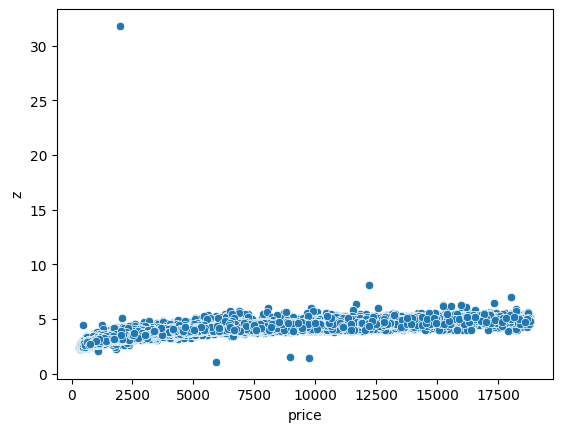

In [47]:
sns.scatterplot(x=data['price'],y=data['z'])

<Axes: xlabel='price', ylabel='x'>

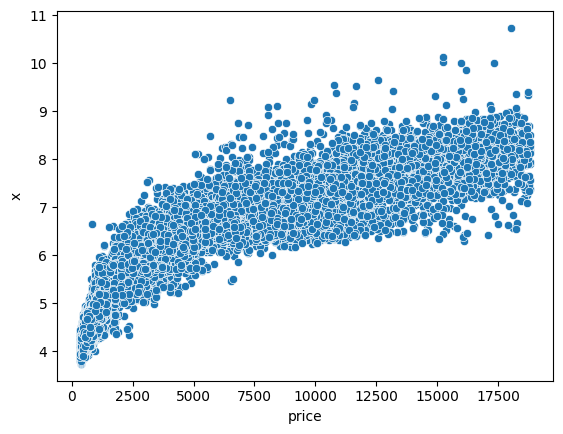

In [48]:
sns.scatterplot(x=data['price'],y=data['x'])

<Axes: xlabel='price', ylabel='depth'>

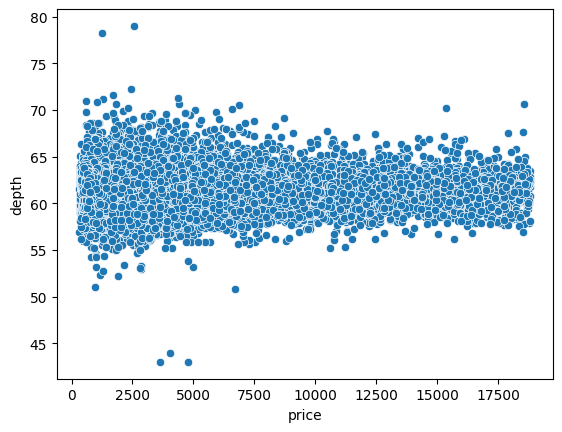

In [49]:
sns.scatterplot(x=data['price'],y=data['depth'])

<Axes: xlabel='price', ylabel='table'>

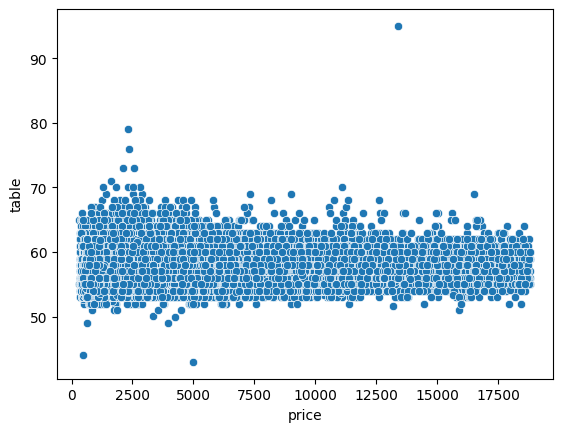

In [50]:
sns.scatterplot(x=data['price'],y=data['table'])

In [51]:
#Dropping the outliers. 
data = data[(data["depth"]<75)&(data["depth"]>45)]
data = data[(data["table"]<80)&(data["table"]>40)]
data = data[(data["x"]<30)]
data = data[(data["y"]<30)]
data = data[(data["z"]<30)&(data["z"]>2)]
data.shape

(43123, 10)

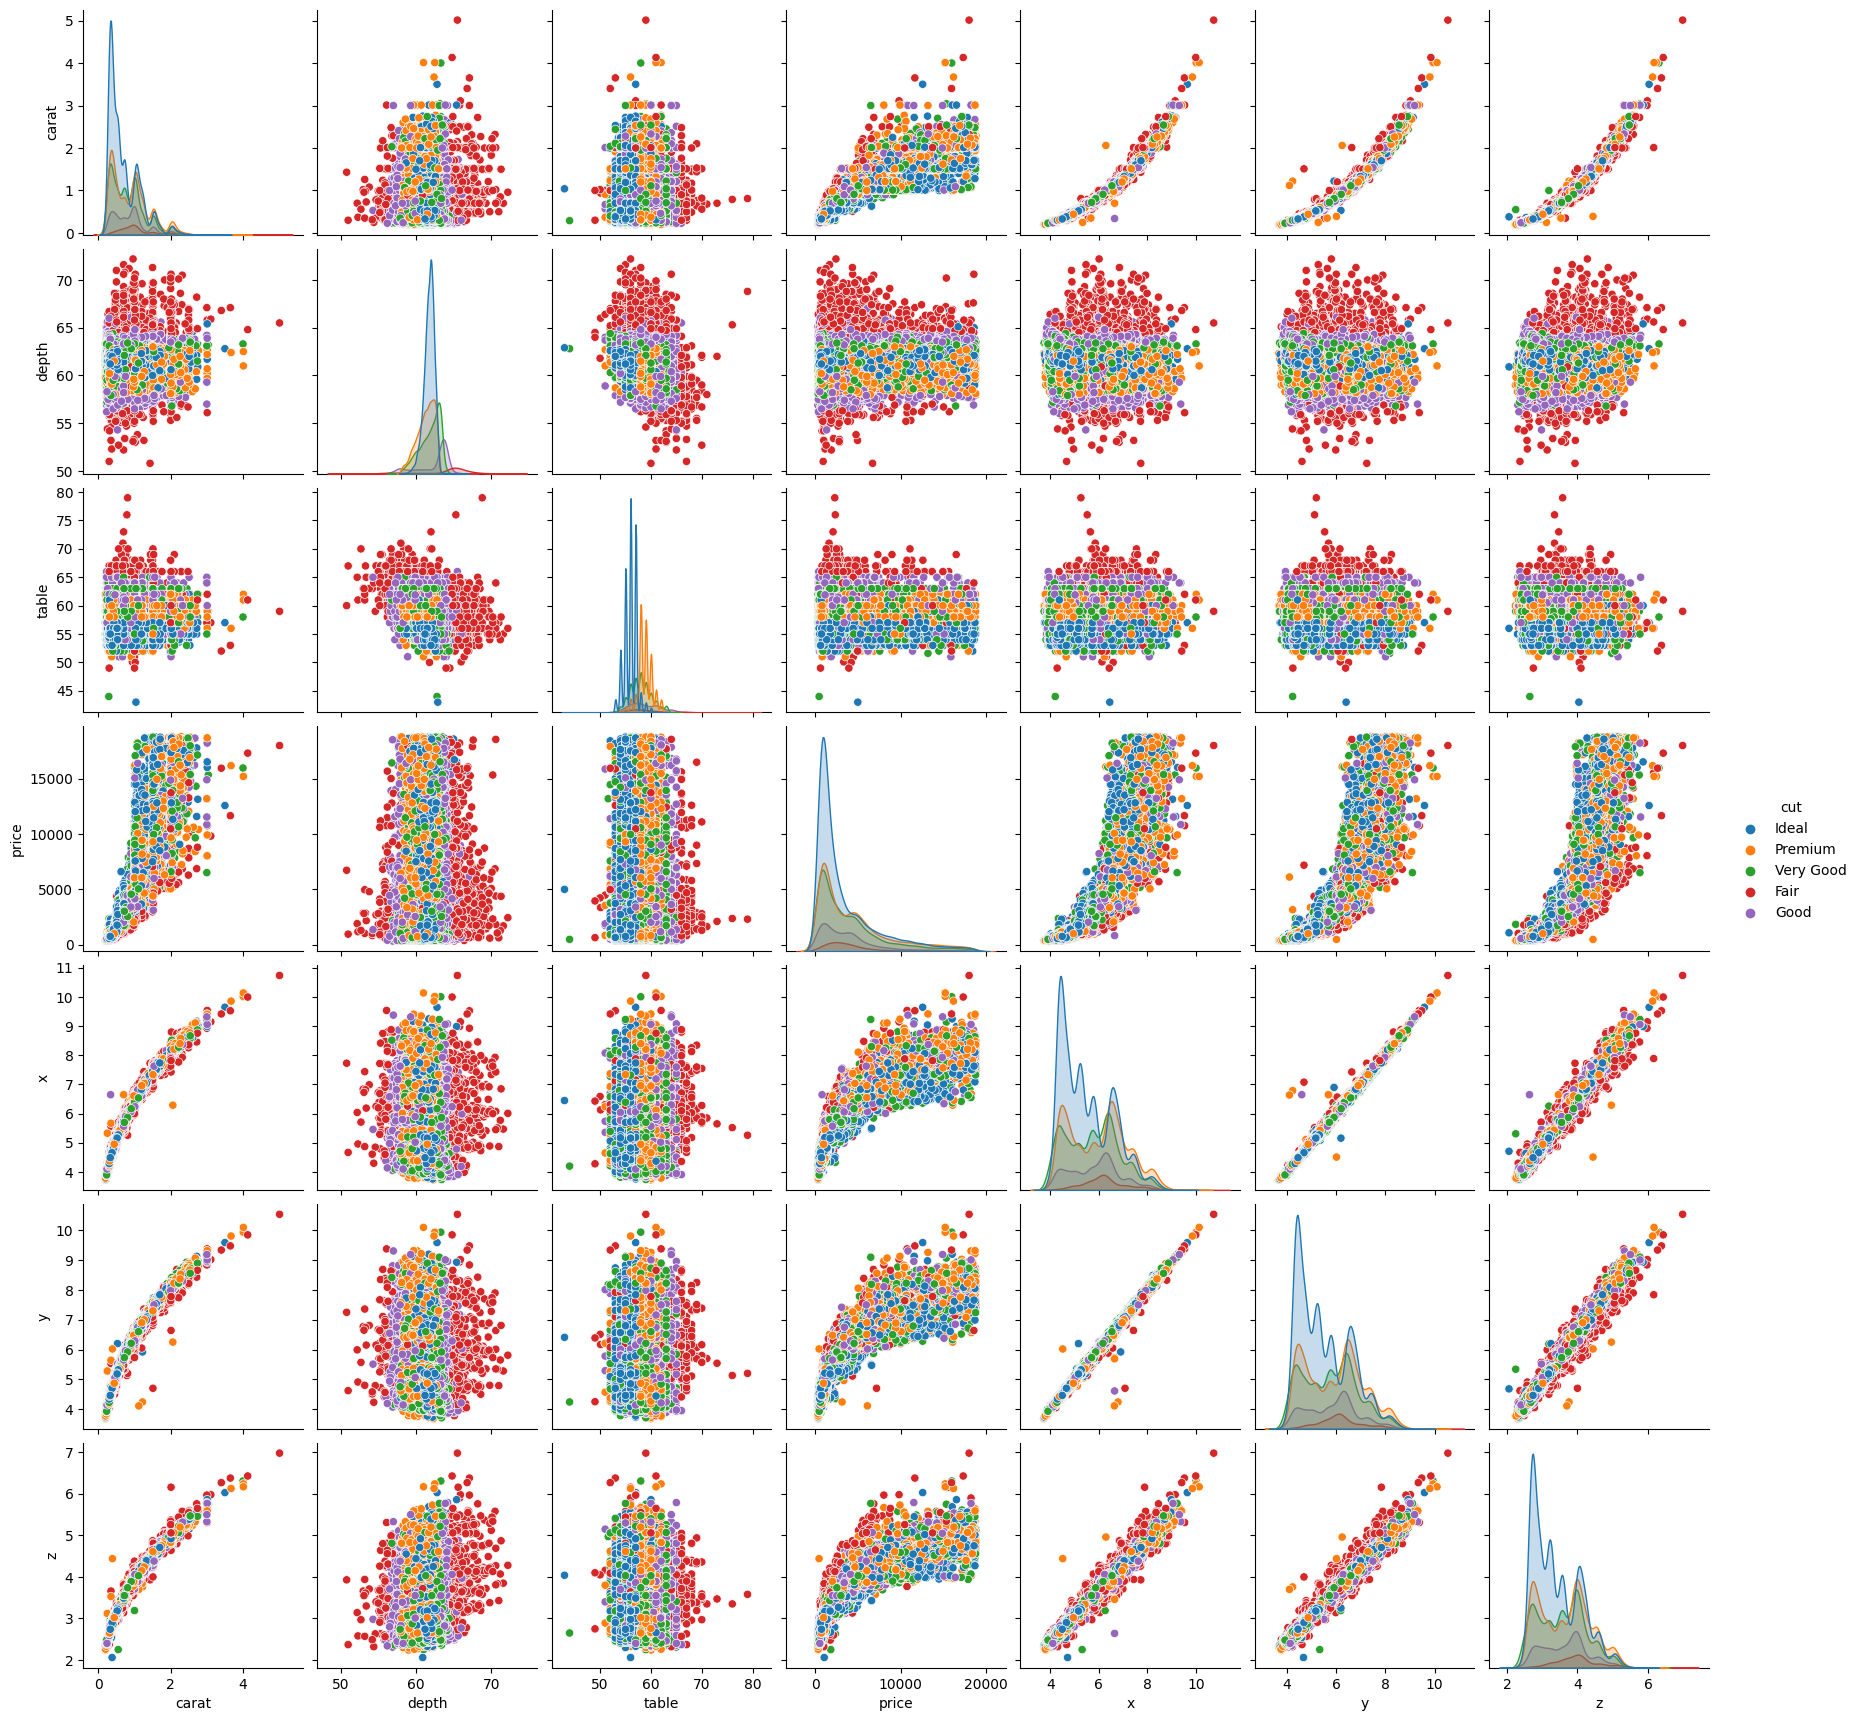

In [52]:
ax=sns.pairplot(data, hue= "cut")

In [53]:
s = (data.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


In [54]:
# Make copy to avoid changing original data 
label_data = data.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.06,2,5,3,61.8,57.0,4270,6.57,6.60,4.07
1,1.51,3,3,7,60.9,58.0,15164,7.38,7.42,4.51
2,0.32,2,2,5,61.3,56.0,828,4.43,4.41,2.71
3,0.53,2,3,5,61.2,56.0,1577,5.19,5.22,3.19
4,0.70,3,4,7,61.0,57.0,2596,5.76,5.72,3.50


In [55]:
data.describe()

,carat,depth,table,price,x,y,z
count,43123.000000,43123.000000,43123.000000,43123.000000,43123.000000,43123.000000,43123.000000
mean,0.797483,61.748069,57.457178,3927.125432,5.731540,5.733063,3.539218
std,0.473284,1.422251,2.224738,3983.184488,1.119277,1.111284,0.691029
min,0.200000,50.800000,43.000000,326.000000,3.730000,3.680000,2.060000
25%,0.400000,61.000000,56.000000,947.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2400.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5310.000000,6.540000,6.540000,4.040000
max,5.010000,72.200000,79.000000,18823.000000,10.740000,10.540000,6.980000


In [57]:
corr_matrix = data.corr()
corr_matrix["price"].sort_values(ascending=False)


<ipython-input-57-aebb2c63edfc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


price    1.000000
carat    0.921868
y        0.888862
x        0.887148
z        0.882801
table    0.128278
depth   -0.012773
Name: price, dtype: float64

<Axes: >

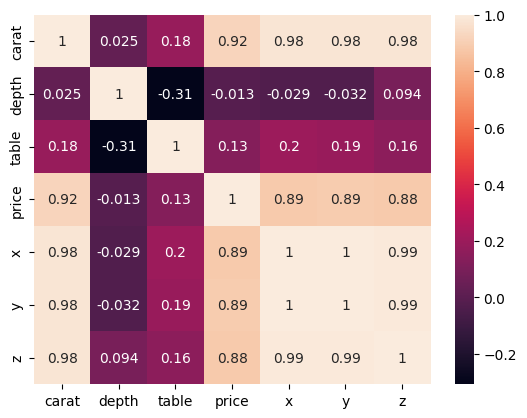

In [58]:
import seaborn as sns
sns.heatmap(corr_matrix, annot=True)

<Axes: >

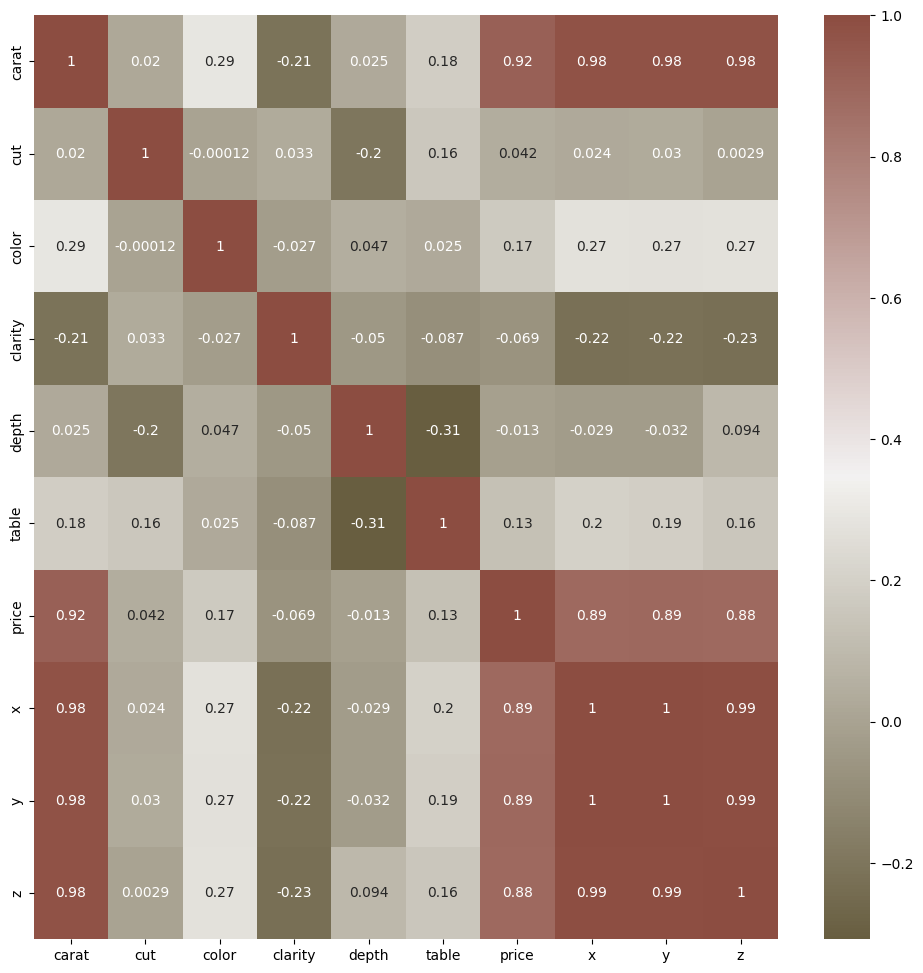

In [59]:
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= label_data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

In [60]:
X= label_data.drop(["price"],axis =1)
y= label_data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

In [61]:
pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",XGBRegressor())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [62]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -1337.447434 
DecisionTree: -765.470807 
RandomForest: -562.061042 
KNeighbors: -845.368067 
XGBRegressor: -552.629705 


In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
pipeline_xgb = Pipeline([
    ("scalar5", StandardScaler()),
    ("rf_classifier", XGBRegressor())
])

# تحديد القيم الممكنة للهيبربارامترات
param_grid = {
    'rf_classifier__learning_rate': [0.01, 0.1, 1],
    'rf_classifier__max_depth': [3, 5, 7, 9],
    'rf_classifier__n_estimators': [50, 100, 150, 200]
}

# تنفيذ البحث عن القيم الأمثل
grid_search = GridSearchCV(pipeline_xgb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scalar5', StandardScaler()),
                                       ('rf_classifier',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     feature_types=None,
                                                     gamma=None, gpu_id=None,
                                                     grow_policy=None,
                                                     importan...
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     n_estimators=100,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     predictor=None,
                                                     random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'rf_classifier__learning_rate': [0.01, 0.1, 1],
                         'rf_classifier__max_depth': [3, 5, 7, 9],
                         'rf_classifier__n_estimators': [50, 100, 150, 200]},
             verbose=1)

In [64]:
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'rf_classifier__learning_rate': 0.1, 'rf_classifier__max_depth': 5, 'rf_classifier__n_estimators': 200}
Best score:  0.9818963080921366


In [65]:
# تحديد القيم الأمثل للهيبربارامترات
best_params = grid_search.best_params_

# إنشاء نموذج جديد باستخدام القيم الأمثل للهيبربارامترات
final_model = XGBRegressor(**best_params)

# تدريب النموذج النهائي على بيانات التدريب
final_model.fit(X_train, y_train)



[17:49:43] WARNING: ../src/learner.cc:767: 
Parameters: { "rf_classifier__learning_rate", "rf_classifier__max_depth", "rf_classifier__n_estimators" } are not used.



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [66]:
pred = final_model.predict(X_test)
# Model Evaluation
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.9795802929705931
Adjusted R^2: 0.9795632307328005
MAE: 283.14661353900055
MSE: 319188.27618073707
RMSE: 564.9675001101718
